# GEOG5415M Final Assignment_Project

Student ID number: 201999579

# **Exploring ULEZ post-expansion air quality patterns across central and outer London**

## **Attribution**

Air quality data were obtained from [London Air Quality](https://www.londonair.org.uk/london/asp/datadownload.asp), providing monitoring data for Regent Street (The Crown Estate) and Bexley (Belvedere).

Spatial boundary data for the London-wide Ultra Low Emission Zone (ULEZ) were sourced from the [London Datastore](https://data.london.gov.uk/dataset/london-wide-ultra-low-emission-zone-2023-vd455).

## **Moudles & Packages**

In [101]:
# Read in required packages
# Data handling
import pandas as pd
import numpy as np

# Date and time handling
from datetime import datetime

# Spatial data handling
import geopandas as gpd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical modelling
import statsmodels.api as sm
import statsmodels.formula.api as smf

## **London air quality data**

The London air quality data used in this study consist of pollutant concentration measurements from selected monitoring sites, providing comparable temporal coverage to support the analysis of urban air quality patterns across central and suburban London.

### **Regent Street (The Crown Estate)-29082023-31122025**

In [102]:
# Load Regent Street air quality data
regent = pd.read_csv("Regent Street (The Crown Estate)-29082023-31122025.csv")

# Preview the dataset
regent.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CE3,NO,29/08/2023 00:00,27.7,ug m-3,R
1,CE3,NO,30/08/2023 00:00,38.4,ug m-3,R
2,CE3,NO,31/08/2023 00:00,41.8,ug m-3,R
3,CE3,NO,01/09/2023 00:00,24.4,ug m-3,R
4,CE3,NO,02/09/2023 00:00,5.3,ug m-3,R


In [103]:
# Inspect data structure and missing values
regent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     5130 non-null   object 
 1   Species                  5130 non-null   object 
 2   ReadingDateTime          5130 non-null   object 
 3   Value                    2532 non-null   float64
 4   Units                    5130 non-null   object 
 5   Provisional or Ratified  5130 non-null   object 
dtypes: float64(1), object(5)
memory usage: 240.6+ KB


In [104]:
# Summary statistics for numeric variables
regent.describe()

,Value
count,2532.000000
mean,25.402528
std,25.332694
min,1.600000
25%,8.300000
50%,15.600000
75%,33.700000
max,165.899990


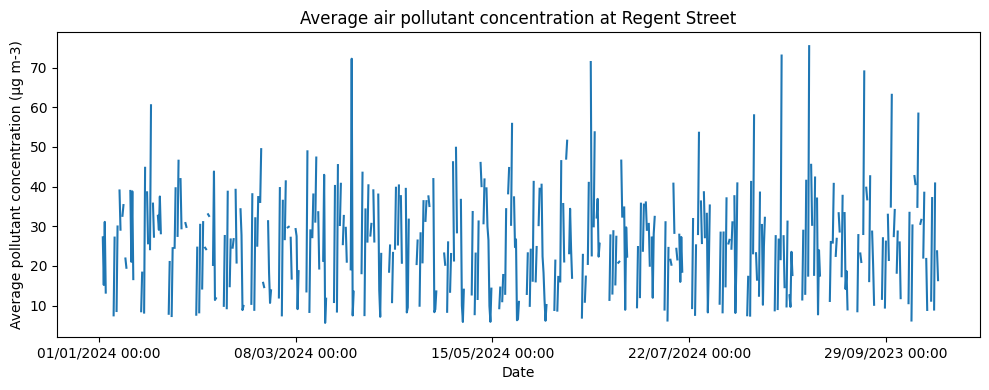

In [105]:
# Exploratory time series plot
plt.figure(figsize=(10, 4))
regent.groupby("ReadingDateTime")["Value"].mean().plot()
plt.xlabel("Date")
plt.ylabel("Average pollutant concentration (µg m-3)")
plt.title("Average air pollutant concentration at Regent Street")
plt.tight_layout()
plt.show()

### **Bexley(Belvedere)-29082023-31122025**

In [106]:
# Load Bexley (Belvedere) air quality data
bexley = pd.read_csv("Bexley(Belvedere)-29082023-31122025.csv")

# Preview the dataset
bexley.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BX2,NO,29/08/2023 00:00,1.4,ug m-3,R
1,BX2,NO,30/08/2023 00:00,0.9,ug m-3,R
2,BX2,NO,31/08/2023 00:00,1.6,ug m-3,R
3,BX2,NO,01/09/2023 00:00,3.5,ug m-3,R
4,BX2,NO,02/09/2023 00:00,1.4,ug m-3,R


In [107]:
# Inspect data structure and missing values
bexley.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     5130 non-null   object 
 1   Species                  5130 non-null   object 
 2   ReadingDateTime          5130 non-null   object 
 3   Value                    5016 non-null   float64
 4   Units                    5130 non-null   object 
 5   Provisional or Ratified  5130 non-null   object 
dtypes: float64(1), object(5)
memory usage: 240.6+ KB


In [108]:
# Summary statistics for numeric variables
bexley.describe()

,Value
count,5016.000000
mean,11.336025
std,12.013388
min,-0.200000
25%,4.000000
50%,8.100000
75%,14.800000
max,259.399990


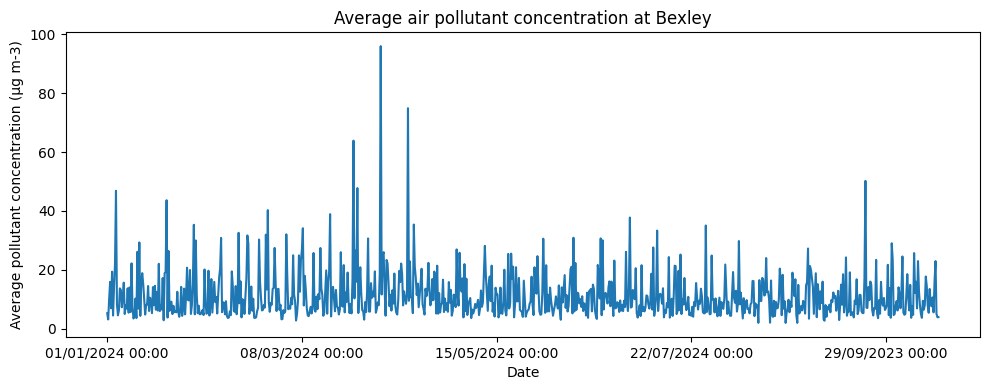

In [109]:
# Exploratory time series plot
plt.figure(figsize=(10, 4))
bexley.groupby("ReadingDateTime")["Value"].mean().plot()
plt.xlabel("Date")
plt.ylabel("Average pollutant concentration (µg m-3)")
plt.title("Average air pollutant concentration at Bexley")
plt.tight_layout()
plt.show()

### **ULEZ Spatial Boundary**

In [110]:
# Load London wide ULEZ boundary data
ulez = gpd.read_file("LondonWideUltraLowEmissionZone.geojson")

# Preview the spatial dataset
ulez.head()

,fid,OBJECTID,BOUNDARY,Shape_Leng,Shape_Area,geometry
0,1,1,Low Emission Zone,733.164783,1.138223e+04,"MULTIPOLYGON (((541586.646 188716.65, 541614.8..."
1,2,2,Low Emission Zone,337892.448849,1.513265e+09,"MULTIPOLYGON (((506907.202 178528.646, 506996...."
2,3,3,Low Emission Zone,17183.769565,8.829230e+06,"MULTIPOLYGON (((520310.95 165103.599, 520327.5..."
3,4,4,Low Emission Zone,719.524695,1.001440e+04,"MULTIPOLYGON (((539777.804 190427.3, 539777.95..."
4,5,5,Low Emission Zone,964.417463,2.050801e+04,"MULTIPOLYGON (((551711.087 181519.49, 551712.8..."


In [111]:
# Inspect spatial data structure and coordinate reference system
ulez.info()
ulez.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fid         22 non-null     int32   
 1   OBJECTID    22 non-null     int32   
 2   BOUNDARY    22 non-null     object  
 3   Shape_Leng  22 non-null     float64 
 4   Shape_Area  22 non-null     float64 
 5   geometry    22 non-null     geometry
dtypes: float64(2), geometry(1), int32(2), object(1)
memory usage: 1012.0+ bytes


<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

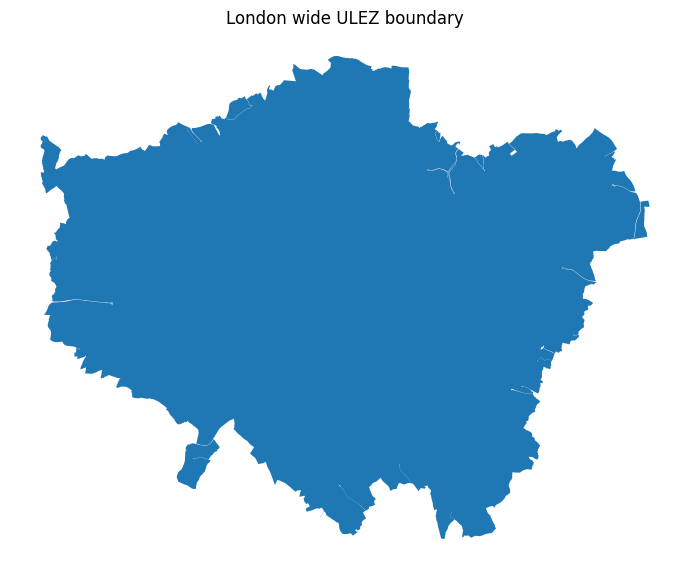

In [112]:
# Map plot
fig, ax = plt.subplots(figsize=(7, 7))
ulez.plot(ax=ax)
ax.set_title("London wide ULEZ boundary")
ax.set_axis_off()
plt.tight_layout()
plt.show()

## **Data Cleaning**

To ensure consistency across datasets and enable reliable temporal analysis, datetime and concentration fields are standardised prior to further processing.

### **Regent Street (The Crown Estate)**

In [113]:
# Copy to avoid modifying raw data
regent_clean = regent.copy()

# Convert datetime
regent_clean["ReadingDateTime"] = pd.to_datetime(
    regent_clean["ReadingDateTime"],
    dayfirst=True,
    errors="coerce"
)

# Ensure pollutant values are numeric
regent_clean["Value"] = pd.to_numeric(
    regent_clean["Value"],
    errors="coerce"
)

# Check result
regent_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site                     5130 non-null   object        
 1   Species                  5130 non-null   object        
 2   ReadingDateTime          5130 non-null   datetime64[ns]
 3   Value                    2532 non-null   float64       
 4   Units                    5130 non-null   object        
 5   Provisional or Ratified  5130 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 240.6+ KB


### **Bexley (Belvedere)**

In [114]:
# Copy to avoid modifying raw data
bexley_clean = bexley.copy()

# Convert datetime
bexley_clean["ReadingDateTime"] = pd.to_datetime(
    bexley_clean["ReadingDateTime"],
    dayfirst=True,
    errors="coerce"
)

# Ensure pollutant values are numeric
bexley_clean["Value"] = pd.to_numeric(
    bexley_clean["Value"],
    errors="coerce"
)

# Check result
bexley_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site                     5130 non-null   object        
 1   Species                  5130 non-null   object        
 2   ReadingDateTime          5130 non-null   datetime64[ns]
 3   Value                    5016 non-null   float64       
 4   Units                    5130 non-null   object        
 5   Provisional or Ratified  5130 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 240.6+ KB


### **Handling missing values in pollutant concentrations**

Missing pollutant concentration values are retained in the cleaned datasets but excluded from subsequent analyses. This approach avoids introducing assumptions through imputation while ensuring statistical analyses are based on valid observations only.

In [115]:
missing_summary = pd.DataFrame({
    "Missing_values": [
        regent_clean["Value"].isna().sum(),
        bexley_clean["Value"].isna().sum()
    ],
    "Total_records": [
        len(regent_clean),
        len(bexley_clean)
    ]
}, index=["Regent Street", "Bexley (Belvedere)"])

missing_summary

,Missing_values,Total_records
Regent Street,2598,5130
Bexley (Belvedere),114,5130


In [116]:
regent_valid = regent_clean.dropna(subset=["ReadingDateTime", "Value"])
bexley_valid = bexley_clean.dropna(subset=["ReadingDateTime", "Value"])

### **Filtering to relevant pollutant species**

This analysis focuses on nitrogen dioxide (NO₂), a traffic-related pollutant closely associated with vehicle emissions and commonly used in evaluations of low emission transport policies.

In [117]:
# Filter to NO2 measurements only
regent_no2 = regent_valid[regent_valid["Species"] == "NO2"]
bexley_no2 = bexley_valid[bexley_valid["Species"] == "NO2"]

# Quick check
print(regent_no2.shape, bexley_no2.shape)

(313, 6) (842, 6)


### **Adding location labels for comparative analysis**

In [118]:
regent_no2["Location"] = "Central London"
bexley_no2["Location"] = "Outer London"

# Combine datasets
air_quality_clean = pd.concat(
    [regent_no2, bexley_no2],
    ignore_index=True
)

air_quality_clean.head()

/tmp/ipython-input-3941983224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regent_no2["Location"] = "Central London"
/tmp/ipython-input-3941983224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bexley_no2["Location"] = "Outer London"


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Location
0,CE3,NO2,2023-08-29,34.2,ug m-3,R,Central London
1,CE3,NO2,2023-08-30,39.5,ug m-3,R,Central London
2,CE3,NO2,2023-08-31,46.6,ug m-3,R,Central London
3,CE3,NO2,2023-09-01,37.5,ug m-3,R,Central London
4,CE3,NO2,2023-09-02,26.0,ug m-3,R,Central London


### **Visualising cleaned NO₂ data**

Boxplots are used to compare the distribution of cleaned NO₂ concentrations between central and outer London monitoring sites.
This visualisation highlights differences in central tendency, variability, and the presence of extreme values, supporting subsequent comparative analysis.

<Figure size 600x400 with 0 Axes>

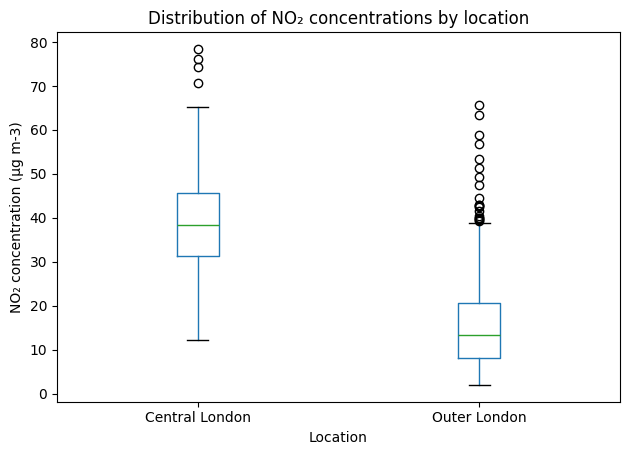

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

air_quality_clean.boxplot(
    column="Value",
    by="Location",
    grid=False
)

plt.suptitle("")
plt.title("Distribution of NO₂ concentrations by location")
plt.xlabel("Location")
plt.ylabel("NO₂ concentration (µg m-3)")
plt.tight_layout()
plt.show()

Time-series plots of cleaned NO₂ concentrations are used to assess temporal consistency and overall trends at each monitoring site.

The absence of abrupt gaps or discontinuities suggests that the data cleaning steps did not introduce artificial temporal artefacts.

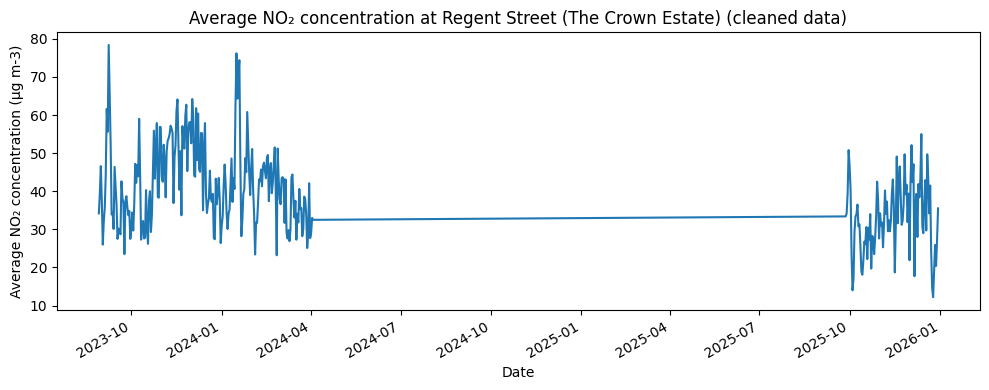

In [120]:
plt.figure(figsize=(10, 4))

regent_no2.groupby("ReadingDateTime")["Value"].mean().plot()

plt.xlabel("Date")
plt.ylabel("Average NO₂ concentration (µg m-3)")
plt.title("Average NO₂ concentration at Regent Street (The Crown Estate) (cleaned data)")
plt.tight_layout()
plt.show()

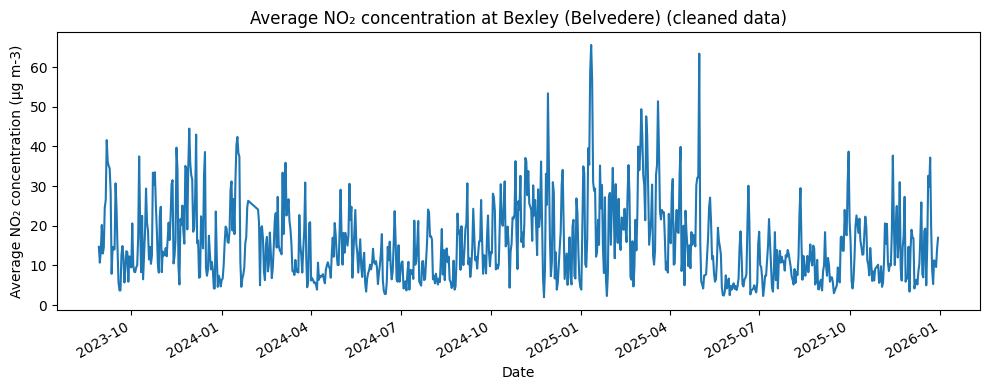

In [121]:
plt.figure(figsize=(10, 4))

bexley_no2.groupby("ReadingDateTime")["Value"].mean().plot()

plt.xlabel("Date")
plt.ylabel("Average NO₂ concentration (µg m-3)")
plt.title("Average NO₂ concentration at Bexley (Belvedere) (cleaned data)")
plt.tight_layout()
plt.show()

## **Statistical modelling**

Examine whether NO₂ concentrations differ between central and outer London monitoring sites during the ULEZ post-expansion period.

In [122]:
import statsmodels.formula.api as smf

# Ensure Location is treated as a categorical variable
air_quality_clean["Location"] = air_quality_clean["Location"].astype("category")

# Quick check
air_quality_clean[["Value", "Location"]].head()

,Value,Location
0,34.2,Central London
1,39.5,Central London
2,46.6,Central London
3,37.5,Central London
4,26.0,Central London


NO₂ concentration = β0 ​+ β1 ​(Location) + ϵ

In [123]:
# Fit linear regression model
model = smf.ols(
    formula="Value ~ Location",
    data=air_quality_clean
).fit()

# Model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     1230.
Date:                Fri, 30 Jan 2026   Prob (F-statistic):          5.68e-184
Time:                        07:14:16   Log-Likelihood:                -4326.4
No. Observations:                1155   AIC:                             8657.
Df Residuals:                    1153   BIC:                             8667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   39.4489      0.580     68.060      0.000      38.312      40.586
Location[T.Outer London]   -23.8078      0.679    -35.070      0.000     -25.140     -22.476
==============================================================================
Omnibus:                      183.787   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.971
Skew:                           1.015   Prob(JB):                     2.98e-68
Kurtosis:                       4.530   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A linear regression model was fitted to examine the association between monitoring location and NO₂ concentrations.

The model explains approximately 51.6% of the variance in NO₂ concentrations (R² = 0.516), indicating that monitoring location alone accounts for a substantial proportion of the observed variability.

The intercept (39.45 µg m⁻³) represents the estimated mean NO₂ concentration at the central London monitoring site (Regent Street).
The coefficient for Outer London is −23.81 µg m⁻³ (95% CI: −25.14 to −22.48), indicating that average NO₂ concentrations at the outer London site (Bexley) are substantially lower than those observed in central London.

The location coefficient is highly statistically significant (p < 0.001), suggesting a clear and consistent difference in NO₂ levels between the two monitoring locations during the study period.

Although the model captures a strong association between location and NO₂ concentration, it includes only a single explanatory variable. As such, it does not account for other factors such as meteorological conditions, traffic volume, or temporal autocorrelation, and the results should be interpreted as associational rather than causal.

A linear regression framework was selected due to the continuous nature of the response variable (NO₂ concentration) and the categorical structure of the explanatory variable (monitoring location).
This approach provides an interpretable first-order assessment of spatial differences in air quality and is well suited to exploratory comparative analysis.

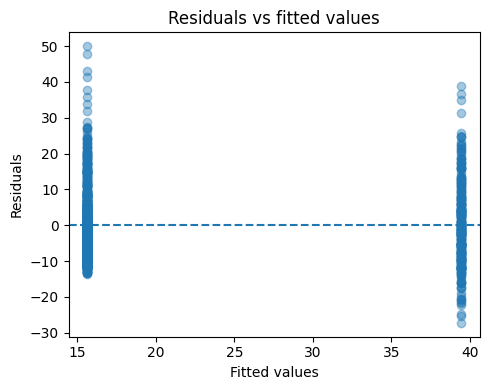

In [124]:
import matplotlib.pyplot as plt

# Residuals vs fitted
plt.figure(figsize=(5, 4))
plt.scatter(model.fittedvalues, model.resid, alpha=0.4)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted values")
plt.tight_layout()
plt.show()

The residuals–fitted plot shows two vertical bands, reflecting the two fitted mean values for central and outer London in a model with a single categorical predictor. Residuals are generally centred around zero, indicating no strong systematic bias. Variability appears higher for the central London site, consistent with earlier exploratory analysis. No clear non-linear pattern is evident, suggesting the linear model provides a reasonable first-order approximation.

## **Data Visualisation**

### **Non-spatial visualization: Comparison of NO₂ in Central London vs Outer London**

Target audience: General public / policy stakeholders

This non-spatial visualisation compares average NO₂ concentrations between central and outer London monitoring sites. Error bars represent 95% confidence intervals, allowing an accessible comparison of pollution levels across locations.

/tmp/ipython-input-1185807511.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = air_quality_clean.groupby("Location")["Value"].agg(


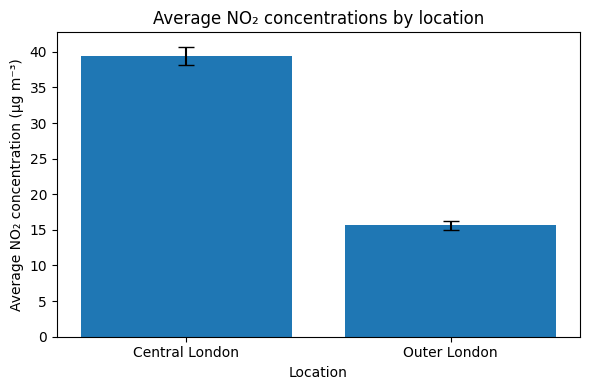

In [125]:
import matplotlib.pyplot as plt

# Calculate mean and confidence intervals by location
summary = air_quality_clean.groupby("Location")["Value"].agg(
    mean="mean",
    std="std",
    n="count"
)

summary["se"] = summary["std"] / (summary["n"] ** 0.5)
summary["ci"] = 1.96 * summary["se"]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(
    summary.index,
    summary["mean"],
    yerr=summary["ci"],
    capsize=6
)

plt.ylabel("Average NO₂ concentration (µg m⁻³)")
plt.xlabel("Location")
plt.title("Average NO₂ concentrations by location")
plt.tight_layout()
plt.show()

### **Spatial visualization: ULEZ boundaries + monitoring point locations**

Target audience: Policymakers / Academic readers

Semi-transparent circles represent an 8 km radius around each monitoring location and are coloured by the site's mean NO₂ concentration during the study period. The buffers provide illustrative spatial context rather than implying continuous spatial variation across London.

In [126]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Mean NO2 values from cleaned datasets
regent_mean = regent_no2["Value"].mean()
bexley_mean = bexley_no2["Value"].mean()

# Monitoring sites with mean NO2
sites = gpd.GeoDataFrame(
    {
        "Site": ["Regent Street", "Bexley (Belvedere)"],
        "NO2_mean": [regent_mean, bexley_mean],
        "geometry": [
            Point(-0.1337, 51.5090),  # Regent Street (approx.)
            Point(0.1280, 51.4900)    # Bexley (Belvedere) (approx.)
        ]
    },
    crs="EPSG:4326"
)

# Project to metric CRS for buffering
ulez_m = ulez.to_crs("EPSG:27700")
sites_m = sites.to_crs("EPSG:27700")

# Create 8 km buffers
sites_m["geometry"] = sites_m.geometry.buffer(8000)

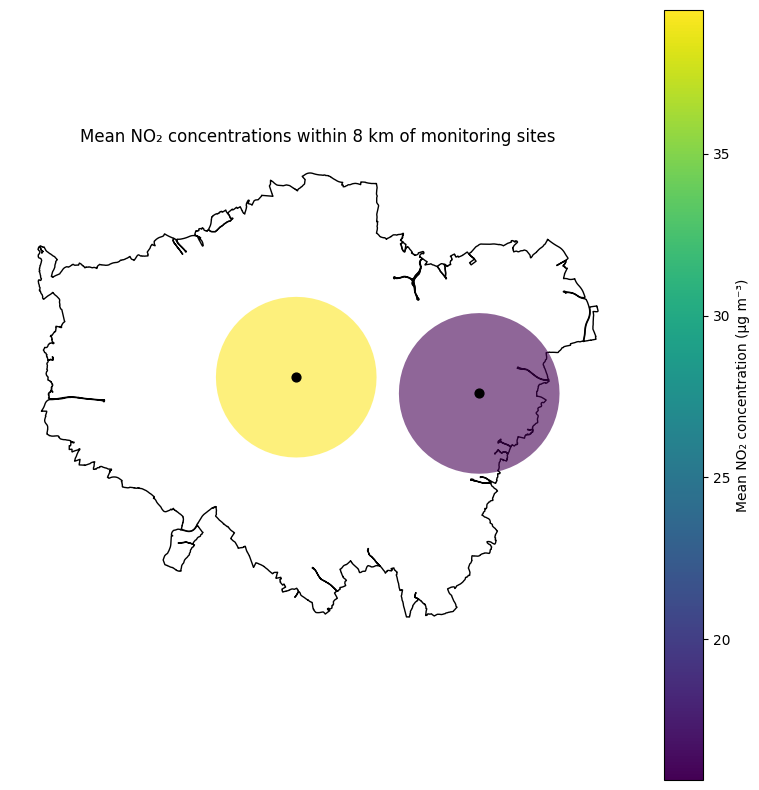

In [127]:
fig, ax = plt.subplots(figsize=(8, 8))

# Base map ULEZ boundary
ulez_m.plot(
    ax=ax,
    color="none",
    edgecolor="black",
    linewidth=1
)

# Gradient buffers representing mean NO2
sites_m.plot(
    ax=ax,
    column="NO2_mean",
    cmap="viridis",
    alpha=0.6,
    legend=True,
    legend_kwds={"label": "Mean NO₂ concentration (µg m⁻³)"}
)

# Original site points on top
sites.to_crs(ulez_m.crs).plot(
    ax=ax,
    color="black",
    markersize=40
)

ax.set_title("Mean NO₂ concentrations within 8 km of monitoring sites")
ax.set_axis_off()
plt.tight_layout()
plt.show()

## **Limitations**

This project uses data from only two monitoring sites, which limits the ability to generalise findings to wider spatial patterns across London. The analysis focuses on the ULEZ post expansion period and therefore examines associations rather than causal impacts of the policy. In addition, the regression model includes location as the sole explanatory variable and does not account for other influences on air quality such as weather or traffic conditions.

## **Conclusions**

This project explored post-expansion air quality patterns across central and outer London using NO₂ measurements from two monitoring sites. The analysis shows consistently higher NO₂ concentrations at the central London site compared with the outer London site. A difference that is also reflected in the statistical model results. While these findings highlight clear spatial contrasts in air quality during the project period, they represent associations rather than causal effects of the ULEZ policy. Overall, the analysis demonstrates how open air quality and spatial data can be combined to provide interpretable insights into urban air pollution patterns.